This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import xanespy
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: 'ZMQInteractiveShell' object has no attribute 'define_magic'

# Importing SSRL Dataset


In [6]:
xanespy.import_ssrl_frameset(directory='ssrl-txm-data/', hdf_filename='imported-ssrl-data.h5')

 Importing frames: 100%|██████████| 26/26 [00:02<00:00, 11.05it/s]Saving to HDF5 file imported-ssrl-data.h5 in group ssrl-test-data_rep1

Remember to run XanesFrameset.correct_magnification()


In [8]:
%lprun?

Object `%lprun` not found.


In [4]:
fs = xanespy.XanesFrameset(filename='imported-ssrl-data.h5', edge=xanespy.k_edges['Ni_NCA'])
%lprun fs.correct_magnification()

Center: 8352.3149176
Goodness of fit: 0.002070405398038423


(8340, 8360)

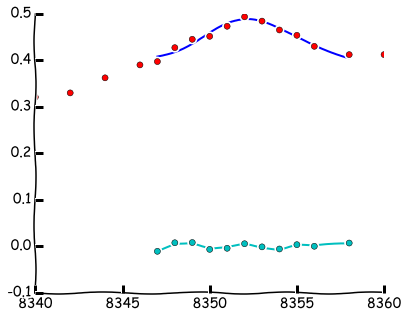

In [2]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum[8347:8358])
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)